In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as la

In [2]:
#2.2 Implementation and Numerical Experiments
LeftX = 0.0
RightX = 10.0
LeftY = 0.0
RightY = 5.0
Nx = 200 # number of intervals in x-direction
Ny = 100 # number of intervals in y-direction
dx = (RightX-LeftX)/Nx # grid step in x-direction
dy =(RightY-LeftY)/Ny # grid step in y-direction
Lx=10.0 #same as rightx but im lazy to change Lx in an equation I already typed
Ly=5.0 #same as righty

[[0.05 0.1  0.15 ... 9.85 9.9  9.95]
 [0.05 0.1  0.15 ... 9.85 9.9  9.95]
 [0.05 0.1  0.15 ... 9.85 9.9  9.95]
 ...
 [0.05 0.1  0.15 ... 9.85 9.9  9.95]
 [0.05 0.1  0.15 ... 9.85 9.9  9.95]
 [0.05 0.1  0.15 ... 9.85 9.9  9.95]]
[[0.05 0.05 0.05 ... 0.05 0.05 0.05]
 [0.1  0.1  0.1  ... 0.1  0.1  0.1 ]
 [0.15 0.15 0.15 ... 0.15 0.15 0.15]
 ...
 [4.85 4.85 4.85 ... 4.85 4.85 4.85]
 [4.9  4.9  4.9  ... 4.9  4.9  4.9 ]
 [4.95 4.95 4.95 ... 4.95 4.95 4.95]]


Text(0.5, 1.0, 'Heat map of the coefficient function K')

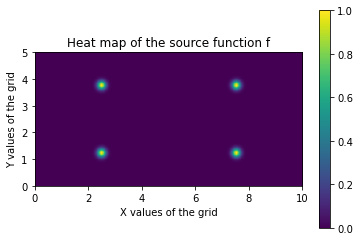

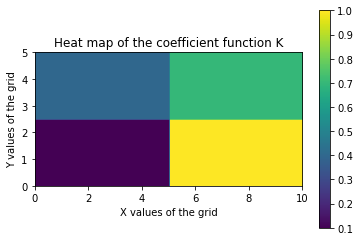

In [3]:
#1.
def sourcefunc(x,y):
    f=np.exp(-40.0*(((x-0.25*Lx)*(x-0.25*Lx))+((y-0.25*Ly)*(y-0.25*Ly))))+np.exp(-40.0*(((x-0.25*Lx)*(x-0.25*Lx))+((y-0.75*Ly)*(y-0.75*Ly))))+np.exp(-40.0*(((x-0.75*Lx)*(x-0.75*Lx))+((y-0.75*Ly)*(y-0.75*Ly))))+np.exp(-40.0*(((x-0.75*Lx)*(x-0.75*Lx))+((y-0.25*Ly)*(y-0.25*Ly))))
    return f
# x=np.linspace(LeftX,RightX,Nx-1)
# y=np.linspace(LeftY,RightY,Ny-1)
x,y = np.mgrid[(LeftX+dx):RightX-dx:(Nx-1)*1j, (LeftY+dy): RightY-dy:(Ny-1)*1j]
print(x.transpose())
print(y.transpose())
f = sourcefunc(x,y)
# visualizing the source function
# x=np.reshape(x,(1,(Nx-1)*(Ny-1)))
# y=np.reshape(y,(1,(Nx-1)*(Ny-1)))
# x=x.transpose()
# y=y.transpose()
plt.ion()
plt.figure(1)
plt.clf()
plt.imshow(f.transpose(),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Heat map of the source function f')
 # additional commands to make your plot look correct
def coeffK(x,y):
    K=(np.logical_and(x<Lx/2, y<Ly/2)*0.1)+(np.logical_and(x<Lx/2,y>=Ly/2)*0.4)+(np.logical_and(x>=Lx/2,y>=Ly/2)*0.7)+(np.logical_and(x>=Lx/2,y<Ly/2)*1.0)
#     K=K+np.logical_and(x<Lx/2,y>=Ly/2)*0.4
#     K=K+np.logical_and(x>=Lx/2,y>=Ly/2)*0.7
#     K=K+np.logical_and(x>=Lx/2,y<Ly/2)*1.0
    return K
K=coeffK(x.transpose(),y.transpose())
# print(K)
# visualizing the coefficient function
plt.ion()
plt.figure(2)
plt.clf()
plt.imshow(np.flip(K,0),extent=[LeftX,RightX, LeftY,RightY], label='Visualization of the K coefficient function')
# plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Heat map of the coefficient function K')
 # additional commands to make your plot look correct

In [4]:
#2.
def create2DLFVM(Nx,Ny,LeftX,RightX,LeftY,RightY,coeffFun):
    dx = (RightX-LeftX)/Nx # grid step in x-direction
    dy =(RightY-LeftY)/Ny # grid step in y-direction
    x=np.linspace(LeftX,RightX,Nx)
    y=np.linspace(LeftY,RightY,Ny)
    diag0=np.zeros((Nx-1)*(Ny-1))
    diagimin1=np.zeros((Nx-1)*(Ny-1)-1)
    diagiplus1=np.zeros((Nx-1)*(Ny-1)-1)
    diagjmin1=np.zeros((Nx-1)*(Ny-2))
    diagjplus1=np.zeros((Nx-1)*(Ny-2))
    n0=0
    nip1=0
    nim1=0
    njp1=0
    njm1=0
    for j in range(Ny-1):
        for i in range(Nx-1):
            diag0[n0]=(((coeffFun(x[i]-0.5*dx,y[j])+coeffFun(x[i]+0.5*dx,y[j]))/(dx**2))+((coeffFun(x[i],y[j]-0.5*dy)+coeffFun(x[i],y[j]+0.5*dy))/(dy)**2))
            n0=n0+1
            if (i<(Nx-2)):
                diagiplus1[nip1]=((-coeffFun(x[i]+0.5*dx,y[j]))/(dx**2))
                nip1=nip1+1
            elif (i==Nx-2):
                nip1=nip1+1
            if (i>(0)):
                diagimin1[nim1]=((-coeffFun(x[i]-0.5*dx,y[j]))/(dx**2))
                nim1=nim1+1
            elif (i==0) and (j>0):
                nim1=nim1+1
            if (j<(Ny-2)):
                diagjplus1[njp1]=((-coeffFun(x[i],y[j]+0.5*dy)/(dy**2)))
                njp1=njp1+1
            if (j>(0)):
                diagjmin1[njm1]=((-coeffFun(x[i],y[j]-0.5*dy))/(dy**2))
                njm1=njm1+1    
#     c
#      for j in range(Ny-1):
#         for i in range(Nx-1):
#             k=coeffFun(x[i],y[j])
#             kminhalfi=coeffFun(x[i]-dx/2, y[j])
#             kplushalfi=coeffFun(x[i]+dx/2, y[j])
#             kminhalfj=coeffFun(x[i], y[j]-dy/2)
#             kplushalfj=coeffFun(x[i], y[j]+dy/2)
    A=sp.diags([diag0, diagimin1, diagiplus1, diagjmin1, diagjplus1] , [0, -1, 1, -Nx+1, Nx-1], shape=((Nx-1)*(Ny-1),(Nx-1)*(Ny-1)) , format='csc')
    return A
# def create2DLFVM(Nx,Ny,LeftX,RightX,LeftY,RightY,coeffFun):
#     dx = (RightX-LeftX)/Nx # grid step in x-direction
#     dy =(RightY-LeftY)/Ny # grid step in y-direction
#     x,y = np.mgrid[(LeftX+dx):RightX:dx, (LeftY+dy): RightY:dy]
#     diag0=[]
#     diagimin1=[]
#     diagiplus1=[]
#     diagjmin1=[]
#     diagjplus1=[]
#     a=0
#     b=0
#     for j in (y):
#         for i in (x):
#             diag0.append(((coeffFun(i-0.5*dx,j)+coeffFun(i+0.5*dx,j))/(dx**2))+((coeffFun(i,j-0.5*dy)+coeffFun(i,j+0.5*dy))/(dy)**2))
#             diagimin1.append((-coeffFun(i-0.5*dx,j))/(dx**2))
#             diagiplus1.append((-coeffFun(i+0.5*dx,j))/(dx**2))
#             diagjplus1.append((-coeffFun(i,j+0.5*dy))/(dy**2))
#             diagjmin1.append((-coeffFun(i,j-0.5*dy))/(dy**2))
#     diag0=np.array(diag0)
#     diagimin1=np.array(diagimin1)
#     diagiplus1=np.array(diagiplus1)
#     diagjmin1=np.array(diagjmin1)
#     diagjplus1=np.array(diagjplus1)
#     diag0=np.reshape(diag0,-1)
#     diagimin1=np.reshape(diagimin1,-1)
#     diagiplus1=np.reshape(diagiplus1,-1)
#     diagjmin1=np.reshape(diagjmin1,-1)
#     diagjplus1=np.reshape(diagjplus1,-1)
#     A=sp.diags([diag0, diagimin1, diagiplus1, diagjmin1, diagjplus1] , [0, -1, 1, Nx-1, -Nx+1], shape=((Nx-1)*(Ny-1),(Nx-1)*(Ny-1)) , format='csc')
#     return A
def solveFE(uStart,tStart,tEnd,Nt,A,f):
    h=(tEnd-tStart)/Nt
    t=np.linspace(tStart,tEnd, Nt)
    u = uStart
    B=(sp.eye((Nx-1)*(Ny-1))-h*A)
    C=h*f 
    for i in range(1,Nt):
        u=B*u +C#u+h*(-A@uStart+f) #@ (sp.eye(..)-h*A)@uStart +h*f
    return u
def solveTR(uStart,tStart,tEnd,Nt,A,I):
    h=(tEnd-tStart)/Nt
    t=np.linspace(tStart,tEnd, Nt)
    u=uStart
    for i in range(1,Nt):
        u=la.spsolve(I+(h*A/2),(I-(h*A/2))*u+(h*f/2) )
    return u

In [5]:
#3.
tStart=0
tEnd=1
f = sourcefunc(x,y)
f=np.reshape(f,((Nx-1)*(Ny-1),1))
print(np.shape(f))
A=create2DLFVM(Nx,Ny,LeftX,RightX,LeftY,RightY,coeffK)
print(A.toarray())
print(np.shape(A))
val,vec=la.eigs(A)
maxev=np.max(val)
h=2/maxev
Nt=(tEnd-tStart)/h
print ("The stable time step is ", h)
print ("The stable number of time steps is ", Nt)

(19701, 1)
[[ 160.  -40.    0. ...    0.    0.    0.]
 [ -40.  160.  -40. ...    0.    0.    0.]
 [   0.  -40.  160. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1120. -280.    0.]
 [   0.    0.    0. ... -280. 1120. -280.]
 [   0.    0.    0. ...    0. -280. 1120.]]
(19701, 19701)
The stable time step is  (0.0006253709302216124+0j)
The stable number of time steps is  (1599.0509818638843+0j)


(19701, 1)


Text(0.5, 1.0, 'Heat map of the numerical approximation of u(x,y,T) using the Forward Euler Method')

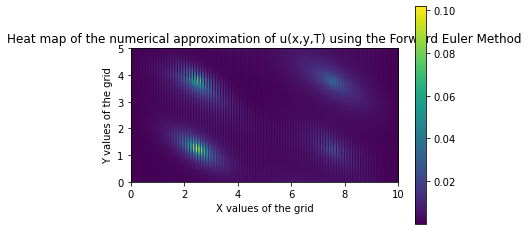

In [6]:
#4.
uStart=np.zeros((Nx-1)*(Ny-1))
uStart=np.reshape(uStart,((Nx-1)*(Ny-1),1))
print(np.shape(uStart))
u1FE=solveFE(uStart, 0, 1, 1600, A,f)
# print(u1FE)
# print(np.shape(u1FE))
uArr1FE = np.reshape(u1FE,((Nx-1),(Ny-1)))
plt.ion()
plt.figure(3)
plt.clf()
plt.imshow(uArr1FE.transpose(),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here #,extent=[LeftX,RightX, LeftY,RightY]
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Heat map of the numerical approximation of u(x,y,T) using the Forward Euler Method')

1600
[[3.99913866e-06]
 [7.81542929e-06]
 [1.12806154e-05]
 ...
 [2.09267495e-05]
 [1.40812110e-05]
 [7.08056623e-06]]
(19701, 1)
The total amount of execution time of the FE method in seconds is  0.1934504508972168  s.


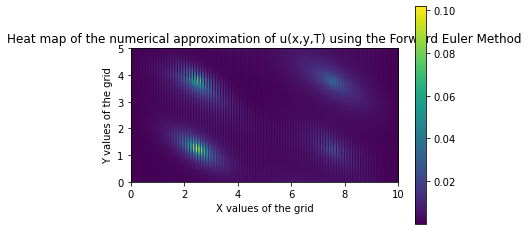

In [7]:
#5.
import time
start=time.time()
uStart=np.zeros((Nx-1)*(Ny-1))
uStart=np.reshape(uStart,((Nx-1)*(Ny-1),1))
Nt=1600
print(Nt)
u1FE=solveFE(uStart, 0, 1, Nt, A,f)
print(u1FE)
print(np.shape(u1FE))
uArr1FE = np.reshape(u1FE,((Nx-1),(Ny-1)))
plt.ion()
plt.figure(4)
plt.clf()
plt.imshow(uArr1FE.transpose(),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here #,extent=[LeftX,RightX, LeftY,RightY]
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Heat map of the numerical approximation of u(x,y,T) using the Forward Euler Method')
end=time.time()
print("The total amount of execution time of the FE method in seconds is ", end-start, " s.")

1600
[[4.00446789e-06]
 [7.82596158e-06]
 [1.12961022e-05]
 ...
 [2.09308544e-05]
 [1.40839513e-05]
 [7.08193749e-06]]
(19701, 1)
The total amount of execution time of the FE method in seconds is  0.34665751457214355  s.


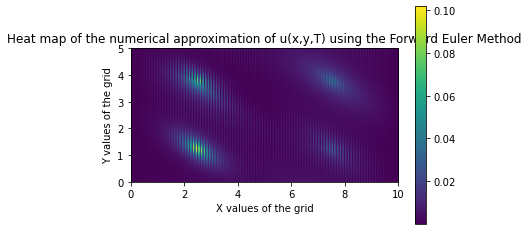

In [8]:
#6.
import time
start=time.time()
uStart=np.zeros((Nx-1)*(Ny-1))
uStart=np.reshape(uStart,((Nx-1)*(Ny-1),1))
Nt=1600
print(Nt)
u2FE=solveFE(uStart, 0, 1, 2*Nt, A,f)
print(u2FE)
print(np.shape(u2FE))
uArr2FE = np.reshape(u2FE,((Nx-1),(Ny-1)))
plt.ion()
plt.figure(5)
plt.clf()
plt.imshow(uArr2FE.transpose(),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here #,extent=[LeftX,RightX, LeftY,RightY]
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Heat map of the numerical approximation of u(x,y,T) using the Forward Euler Method')
end=time.time()
print("The total amount of execution time of the FE method in seconds is ", end-start, " s.")

In [ ]:
#7.
uStart=np.zeros((Nx-1)*(Ny-1))
uStart=np.reshape(uStart,((Nx-1)*(Ny-1),1))
# uTR=np.zeros((8,(Nx-1)*(Ny-1)))
print(np.shape(A))
I=sp.eye((Nx-1)*(Ny-1),(Nx-1)*(Ny-1))
print(np.shape(f))
# I=np.reshape(I,((Nx-1)*(Ny-1),1))
# print(uTR)
for i in range(8):
    Nt=2**i
    print(Nt)
    uTR=solveTR(uStart,0,1,Nt,A,I)
    print(uTR)
plt.ion()
plt.figure(6)
plt.clf()
plt.imshow(uTR.transpose(),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here #,extent=[LeftX,RightX, LeftY,RightY]
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Heat map of the numerical approximation of u(x,y,T) using the Trapezoidal Method')

In [ ]:
#7.
uStart=np.zeros((Nx-1)*(Ny-1))
uStart=np.reshape(uStart,((Nx-1)*(Ny-1),1))
# uTR=np.zeros((8,(Nx-1)*(Ny-1)))
print(np.shape(A))
I=sp.eye((Nx-1)*(Ny-1),(Nx-1)*(Ny-1))
print(np.shape(f))
# I=np.reshape(I,((Nx-1)*(Ny-1),1))
# print(uTR)
# for i in range(8):
#     Nt=2**i
#     print(Nt)
uTR=solveTR(uStart,0,1,2**7,A,I)
print(uTR)
plt.ion()
plt.figure(6)
plt.clf()
plt.imshow(uTR.transpose(),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here #,extent=[LeftX,RightX, LeftY,RightY]
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Heat map of the numerical approximation of u(x,y,T) using the Trapezoidal Method')

(19701, 19701)
(19701, 1)


In [ ]:
#8.
uError=u1FE-uTR8
print(uError)
plt.ion()
plt.figure(6)
plt.clf()
plt.imshow(uError.transpose(),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here #,extent=[LeftX,RightX, LeftY,RightY]
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Heat map of the difference between the numerical approximation of u(x,y,T) using the Forward Euler and the Trapezoidal Method')

In [ ]:
#9.
RMS=np.zeros(2,8)
for i in range (2):
    for j in range(8):
        uTRtild=solveTR(uStart,0,1,Nt,A,I)
        RMS[i,j]=np.sqrt((u1FE-UtrTILD)*(u1FE-UtrTILD))
plt.semilogy(RMS[1:,], Nt)
plt.semilogy(RMS[2:,], Nt)
plt.xlabel("Time steps")
plt.ylabel("RMS difference")